# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Dataset

In [2]:
data=pd.read_csv("1613615-Stock_Price_data_set.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


# Exploring  Data

In [4]:
data.shape

(1009, 7)

In [5]:
data.index

RangeIndex(start=0, stop=1009, step=1)

In [6]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


# Handling Missing Value

In [9]:
data.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [10]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Handling Duplicate Values

In [11]:
data.duplicated().sum()

0

# Handling Outliers

<AxesSubplot:>

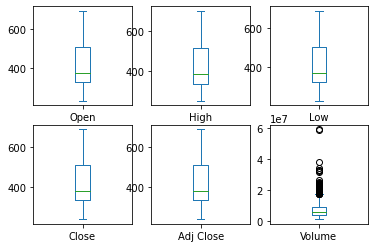

In [12]:
plt.subplot(2,3,1)
data['Open'].plot(kind='box')
plt.subplot(2,3,2)
data['High'].plot(kind='box')
plt.subplot(2,3,3)
data['Low'].plot(kind='box')
plt.subplot(2,3,4)
data['Close'].plot(kind='box')
plt.subplot(2,3,5)
data['Adj Close'].plot(kind='box')
plt.subplot(2,3,6)
data['Volume'].plot(kind='box')

### Handling Outliers in Volume

In [13]:
def find_outlier_limits(col_name):
    Q1,Q3=data[col_name].quantile([.25,.75])
    IQR=Q3-Q1
    low=Q1-(1.5* IQR)
    high=Q3+(1.5* IQR)
    return (high,low)



In [14]:
high_vol,low_vol=find_outlier_limits('Volume')
print('Volume: ','upper limit: ',high_vol,' lower limit: ',low_vol)
data.loc[data['Volume']>high_vol,'Volume']=high_vol

Volume:  upper limit:  17168150.0  lower limit:  -3753850.0


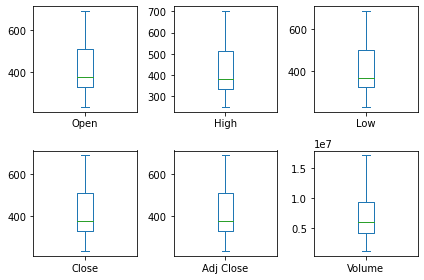

In [15]:
plt.subplot(2,3,1)
data['Open'].plot(kind='box')
plt.subplot(2,3,2)
data['High'].plot(kind='box')
plt.subplot(2,3,3)
data['Low'].plot(kind='box')
plt.subplot(2,3,4)
data['Close'].plot(kind='box')
plt.subplot(2,3,5)
data['Adj Close'].plot(kind='box')
plt.subplot(2,3,6)
data['Volume'].plot(kind='box')
plt.tight_layout()

# Data Understanding

In [16]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,17168150
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,17168150
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [17]:
correlation_df = data[['Date','Open','High','Low','Close','Adj Close','Volume']].corr()
correlation_df

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998605,0.998508,0.996812,0.996812,-0.511750
High,0.998605,1.000000,0.998203,0.998551,0.998551,-0.496643
Low,0.998508,0.998203,1.000000,0.998544,0.998544,-0.528270
Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.511002
Adj Close,0.996812,0.998551,0.998544,1.000000,1.000000,-0.511002
Volume,-0.511750,-0.496643,-0.528270,-0.511002,-0.511002,1.000000


<AxesSubplot:>

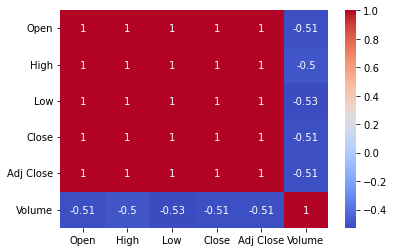

In [18]:
import seaborn as sns
sns.heatmap(correlation_df,cmap="coolwarm",annot = True)

# Use the Open Stock Price Column to Train Your Model.

In [19]:
data_train=pd.read_csv("1613615-Stock_Price_data_set_train.csv")
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [20]:
data_train.shape

(808, 7)

In [21]:
data_test=pd.read_csv("1613615-Stock_Price_data_set_test.csv")
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-04-2021,508.000000,515.460022,503.600006,508.899994,508.899994,22897400
1,22-04-2021,513.820007,513.960022,500.549988,508.779999,508.779999,9061100
2,23-04-2021,509.010010,509.700012,500.700012,505.549988,505.549988,7307700
3,26-04-2021,506.760010,510.480011,503.000000,510.299988,510.299988,4388800
4,27-04-2021,512.619995,512.989990,504.579987,505.549988,505.549988,3761300


In [22]:
data_test.shape

(202, 7)

In [23]:
data_test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
197,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
198,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
199,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
200,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
201,04-02-2022,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [24]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-04-2021,508.000000,515.460022,503.600006,508.899994,508.899994,22897400
1,22-04-2021,513.820007,513.960022,500.549988,508.779999,508.779999,9061100
2,23-04-2021,509.010010,509.700012,500.700012,505.549988,505.549988,7307700
3,26-04-2021,506.760010,510.480011,503.000000,510.299988,510.299988,4388800
4,27-04-2021,512.619995,512.989990,504.579987,505.549988,505.549988,3761300
...,...,...,...,...,...,...,...
197,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
198,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
199,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
200,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [25]:
training_set = data_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[262.      ]
 [247.699997]
 [266.579987]
 [267.079987]
 [253.850006]
 [252.139999]
 [257.290009]
 [260.470001]
 [270.029999]
 [278.730011]
 [277.73999 ]
 [282.070007]
 [283.880005]
 [281.      ]
 [288.75    ]
 [294.769989]
 [293.100006]
 [292.75    ]
 [284.649994]
 [302.850006]
 [319.880005]
 [320.      ]
 [322.200012]
 [321.329987]
 [333.559998]
 [323.869995]
 [318.160004]
 [323.170013]
 [321.420013]
 [315.799988]
 [313.26001 ]
 [316.350006]
 [313.070007]
 [307.410004]
 [309.359985]
 [322.48999 ]
 [298.390015]
 [287.      ]
 [291.940002]
 [285.450012]
 [273.630005]
 [293.149994]
 [289.100006]
 [291.769989]
 [297.679993]
 [302.880005]
 [309.720001]
 [317.290009]
 [315.98999 ]
 [329.660004]
 [336.299988]
 [332.880005]
 [332.220001]
 [329.149994]
 [319.220001]
 [306.369995]
 [310.      ]
 [316.25    ]
 [311.070007]
 [310.359985]
 [311.649994]
 [312.589996]
 [308.709991]
 [321.98999 ]
 [325.899994]
 [328.790009]
 [331.5     ]
 [329.649994]
 [327.25    ]
 [325.940002]
 [326.279999]
 [327.

# Normalizing the Dataset.

In [26]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scalar.fit_transform(training_set)
scaled_training_set

array([[0.08056696],
       [0.03953748],
       [0.09370782],
       [0.09514242],
       [0.05718305],
       [0.05227671],
       [0.06705308],
       [0.07617709],
       [0.10360657],
       [0.12856859],
       [0.12572803],
       [0.13815169],
       [0.14334492],
       [0.13508163],
       [0.15731788],
       [0.17459039],
       [0.16979889],
       [0.16879465],
       [0.14555417],
       [0.19777352],
       [0.24663588],
       [0.24698017],
       [0.25329243],
       [0.25079616],
       [0.28588643],
       [0.25808393],
       [0.24170087],
       [0.25607555],
       [0.25105446],
       [0.23492952],
       [0.22764184],
       [0.23650763],
       [0.22709668],
       [0.21085704],
       [0.21645191],
       [0.25412443],
       [0.18497694],
       [0.15229679],
       [0.16647061],
       [0.14784957],
       [0.11393569],
       [0.16994231],
       [0.15832211],
       [0.16598281],
       [0.18293975],
       [0.19785959],
       [0.21748486],
       [0.239

# Creating x_train and y_train data structures

In [27]:
x_train = []
y_train = []
for i in range(40,808):
    x_train.append(scaled_training_set[i-40:i,0])
    y_train.append(scaled_training_set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [28]:
print(x_train.shape)
print(y_train.shape)

(768, 40)
(768,)


In [29]:
x_train

array([[0.08056696, 0.03953748, 0.09370782, ..., 0.15229679, 0.16647061,
        0.14784957],
       [0.03953748, 0.09370782, 0.09514242, ..., 0.16647061, 0.14784957,
        0.11393569],
       [0.09370782, 0.09514242, 0.05718305, ..., 0.14784957, 0.11393569,
        0.16994231],
       ...,
       [0.90115625, 0.86382802, 0.83516481, ..., 0.9208676 , 0.8901672 ,
        0.90844394],
       [0.86382802, 0.83516481, 0.87762883, ..., 0.8901672 , 0.90844394,
        0.89800021],
       [0.83516481, 0.87762883, 0.90766938, ..., 0.90844394, 0.89800021,
        0.91957643]])

# Reshape the data

In [30]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(768, 40, 1)

#  Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM. 

In [31]:

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [32]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

# Fitting the Model.

In [33]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
24/24 [==============================] - 21s 119ms/step - loss: 0.0575
Epoch 2/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0119
Epoch 3/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0096
Epoch 4/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0094
Epoch 5/100
24/24 [==============================] - 3s 107ms/step - loss: 0.0092
Epoch 6/100
24/24 [==============================] - 3s 113ms/step - loss: 0.0079
Epoch 7/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0086
Epoch 8/100
24/24 [==============================] - 3s 111ms/step - loss: 0.0092
Epoch 9/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0084
Epoch 10/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0077
Epoch 11/100
24/24 [==============================] - 3s 112ms/step - loss: 0.0076
Epoch 12/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0080
Epoch 13/100

# Extracting the Actual Stock Prices from test dataset

In [34]:
data_test=pd.read_csv("1613615-Stock_Price_data_set_test.csv")
actual_stock_price = data_test.iloc[:,1:2]

# Preparing the Input for the Model.

In [35]:
dataset_total = pd.concat((data_train['Open'],data_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(data_test)-40:].values

inputs = inputs.reshape(-1,1)
inputs = scalar.transform(inputs)

x_test = []
for i in range(40,202):
    x_test.append(inputs[i-40:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Predicting the Values of Stock Prices.

In [36]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scalar.inverse_transform(predicted_stock_price)

6/6 [==============================] - 4s 56ms/step


# Plotting the Actual and Predicted Prices for Stocks.

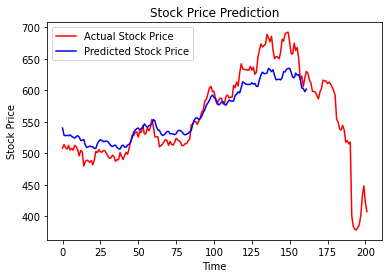

In [37]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Stock Price ')
plt.plot(predicted_stock_price, color = 'blue',label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()